# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them
as reference to assess the relative predictive performance of a given model
of interest.

We illustrate those baselines with the help of the Adult Census dataset,
using only the numerical features for the sake of simplicity.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [2]:
from sklearn.model_selection import ShuffleSplit

In [30]:
cv = ShuffleSplit(n_splits=10,test_size=0.5,random_state=0)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Compute the cross-validation (test) scores for the classifier on this
dataset. Store the results pandas Series as we did in the previous notebook.

In [14]:
from sklearn.model_selection import cross_validate

cv_results_model = cross_validate(
    model, data, target, cv=cv, n_jobs=4
)

In [20]:
import pandas as pd

errors_model = pd.Series(
    cv_results_model['test_score'], name='Logistic regression classifier'
)
errors_model.describe()

count    10.000000
mean      0.813832
std       0.002085
min       0.810327
25%       0.812590
50%       0.814279
75%       0.815435
max       0.816388
Name: Logistic regression classifier, dtype: float64

Now, compute the cross-validation scores of a dummy classifier that
constantly predicts the most frequent class observed the training set. Please
refer to the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [31]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

cv_results_dummy = cross_validate(
    dummy, data, target, cv=cv, n_jobs=4
)
errors_dummy = pd.Series(
    cv_results_dummy['test_score'], name='Dummy strategy=prior'
)
errors_dummy.describe()

count    10.000000
mean      0.760022
std       0.002251
min       0.756808
25%       0.757883
50%       0.760534
75%       0.761834
max       0.763114
Name: Dummy strategy=prior, dtype: float64

Now that we collected the results from the baseline and the model,
concatenate the test scores as columns a single pandas dataframe.

In [21]:
all_errors = pd.concat(
    [errors_model, errors_dummy], axis=1
)
all_errors

,Logistic regression classifier,Dumy classifier
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814709,0.761885
6,0.813112,0.757463
7,0.810327,0.757176
8,0.812416,0.761885
9,0.816388,0.763114



Next, plot the histogram of the cross-validation test scores for both
models with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

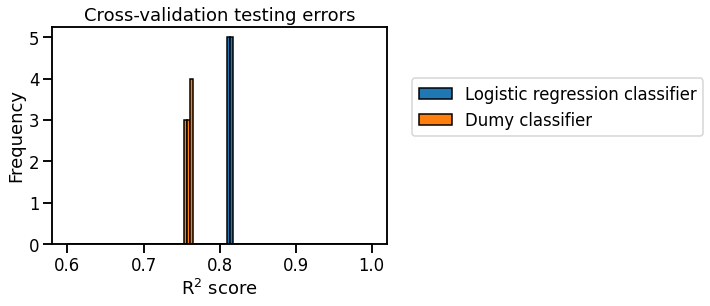

In [35]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0.6, stop=1, num=100)
all_errors.plot.hist(bins=bins, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.xlabel(r'R$^2$ score')
_ = plt.title('Cross-validation testing errors')

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

In [34]:
dummies = {}
strategies = ['most_frequent', 'stratified', 'uniform']
for strategy in strategies:
    dummies[strategy] = {
        'classifier' : DummyClassifier(strategy=strategy)
    }
    cv_results = cross_validate(
        dummies[strategy]['classifier'], data, target, cv=cv, n_jobs=4)
    dummies[strategy]['test_score'] = pd.Series(
        cv_results['test_score'], name=f"Dummy strategy={strategy}")

In [44]:
all_errors = pd.concat(
    [errors_model]+[dummies[strategy]['test_score'] for strategy in strategies], axis='columns'
)
all_errors

,Logistic regression classifier,Dummy strategy=most_frequent,Dummy strategy=stratified,Dummy strategy=uniform
0,0.815937,0.760329,0.636256,0.506122
1,0.813849,0.756808,0.638139,0.494861
2,0.815036,0.759142,0.633758,0.504033
3,0.815569,0.760739,0.636911,0.505958
4,0.810982,0.761681,0.637566,0.495844
5,0.814709,0.761885,0.629049,0.505917
6,0.813112,0.757463,0.635601,0.501290
7,0.810327,0.757176,0.637566,0.501617
8,0.812416,0.761885,0.631792,0.494984
9,0.816388,0.763114,0.634372,0.499693


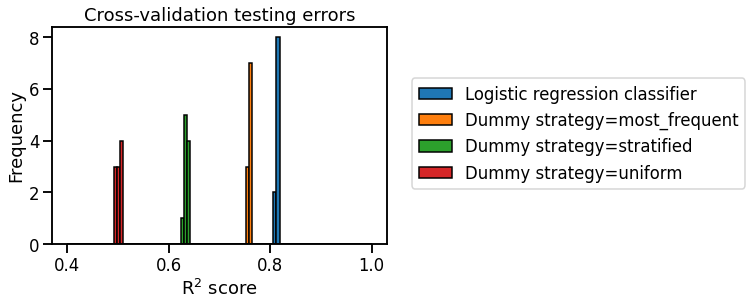

In [45]:
bins = np.linspace(start=0.4, stop=1, num=100)
all_errors.plot.hist(bins=bins, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.xlabel(r'R$^2$ score')
_ = plt.title('Cross-validation testing errors')